<center><Strong><h3>Hammaad Rizwan 2237928</h3></Strong></center>
<h2> Introduction </h2>

#### Getting an Idea of the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
adult_data = pd.read_csv('Data\\adult.data')
adult_test = pd.read_csv('Data\\adult.test')
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Header isnt avaialbe need to add the headers from adult.names file

In [127]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
adult_data.columns = columns
adult_test.columns = columns

# Resave the datasets as csv files
adult_data.to_csv('Data\\adult_data.csv', index=False)
adult_test.to_csv('Data\\adult_test.csv', index=False)

Describe the dataset

In [128]:
adult_data.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


check for missing values

In [129]:
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Check from each column for any incorrect data/ typo

In [130]:
adult_data['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [131]:
adult_data['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [132]:
adult_data['marital_status'].value_counts()

marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [133]:
adult_data['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [134]:
adult_data['relationship'].value_counts()

relationship
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [135]:
adult_data['race'].value_counts()

race
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [136]:
adult_data['sex'].value_counts()

sex
 Male      21789
 Female    10771
Name: count, dtype: int64

In [137]:
adult_data['native-country'].value_counts()

native-country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

there are values with "?" have to identify its importance

<h2>Data Cleaning</h2>

Cleaning the columns starting from workclass

In [138]:
adult_data[adult_data['workclass']==' ?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [139]:
adult_data.drop(adult_data[adult_data['workclass']==' ?'].index, inplace=True)

dropped the rows where the workclass is ['?']

Checking if PCA is Required and how many components

In [140]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
df = adult_data

df = pd.get_dummies(df)

features = df.columns
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Run PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_

for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {explained_variance*100:.2f}% of the variance")

cumulative_variance = 0.0
num_components_to_keep = 0

for explained_variance in explained_variance_ratio:
    cumulative_variance += explained_variance
    num_components_to_keep += 1
    if cumulative_variance >= 0.95:
        break

print(f"Number of principal components to keep: {num_components_to_keep}")

Principal Component 1: 4.84% of the variance
Principal Component 2: 2.95% of the variance
Principal Component 3: 2.41% of the variance
Principal Component 4: 2.17% of the variance
Principal Component 5: 1.85% of the variance
Principal Component 6: 1.76% of the variance
Principal Component 7: 1.74% of the variance
Principal Component 8: 1.55% of the variance
Principal Component 9: 1.48% of the variance
Principal Component 10: 1.32% of the variance
Principal Component 11: 1.29% of the variance
Principal Component 12: 1.22% of the variance
Principal Component 13: 1.19% of the variance
Principal Component 14: 1.16% of the variance
Principal Component 15: 1.15% of the variance
Principal Component 16: 1.13% of the variance
Principal Component 17: 1.11% of the variance
Principal Component 18: 1.08% of the variance
Principal Component 19: 1.07% of the variance
Principal Component 20: 1.07% of the variance
Principal Component 21: 1.04% of the variance
Principal Component 22: 1.03% of the varian

88 components to keep ... so far not required we can check on it later

In [143]:
adult_data.drop(adult_data[adult_data['occupation']==' ?'].index, inplace=True)  
adult_data.drop(adult_data[adult_data['native-country']==' ?'].index, inplace=True)  

Cleaned the data by dropping the missing values

In [4]:
adult_data = pd.read_csv('Data/cleaned_adult_data.csv')

In [4]:
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<h2>EDA</h2>

Analysing using a Pair Plot

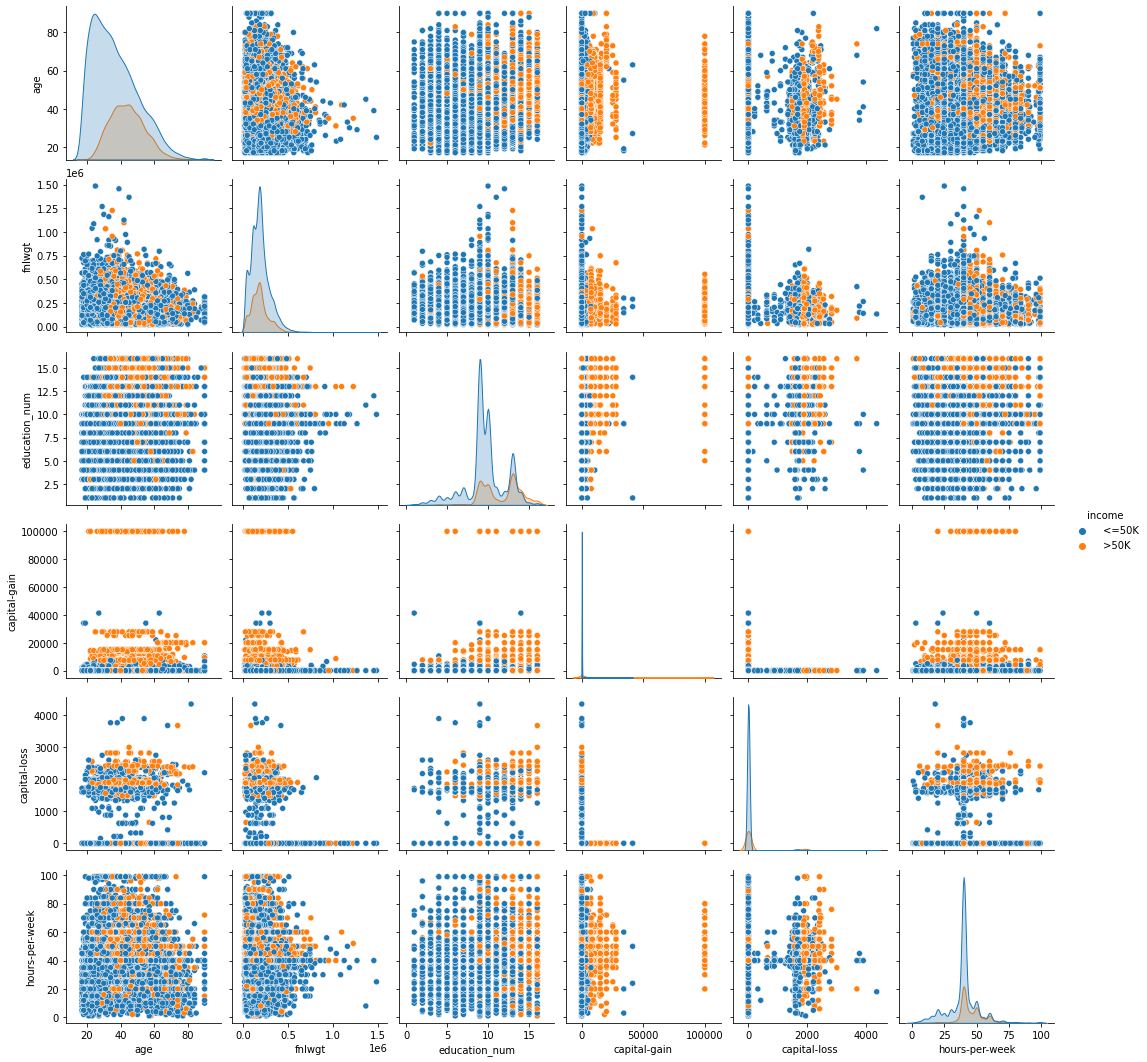

In [10]:
sns.pairplot(adult_data, hue='income')


<h3>Analysis:</h3>

<ul>
<li>Mean age of the individuals are around 30 to 50 years old. High income earners with more than 50K are around the age of 40. while the majority of the income earners who earn 50K or less are under the age of 35.
<br><br>
<li> Majority of the individuals who earn high income had education atleast till the 10th grade or more
<br><br>
<li>Individuals who had an education level till 10th grade had a higher capital gain while very few of those individuals also had the highest capital loss compared to the rest of the individuals 
<br><br>
<li>We can see the distirbution of income is not given fairly since many of the individuals who works 25 - 50 hours per week earn less than 50k compared to a few no of indiciduals who earns more than 50k while working only 35 hours per week
<br><br>
<li>Induvuduals around the age 25-40 earns more than 50K while only woeking for 50 hours per week, while there exisits a very little amount of citizens who earn more than 50K per week at the age of 60 and above
</ul>

<AxesSubplot:xlabel='income', ylabel='age'>

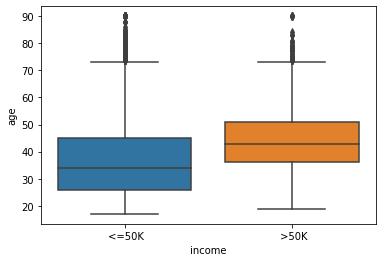

In [21]:
sns.boxplot(x='income', y='age', data=adult_data)


Median age of people who earn 50K or less is around 35 while higher income earners are often around the ages of 40 to 50 this could be due to higher level of experience compared to younger individuals.

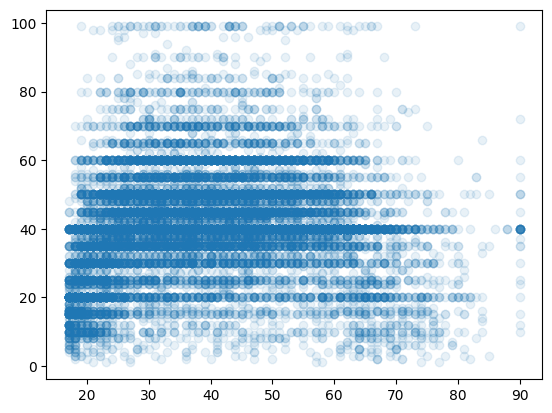

In [13]:
plt.plot(adult_data['age'], adult_data['hours-per-week'], 'o', alpha=0.1)


This plot shows the relationship between the age and hours worked per week, individuals around 40 years old works longer hours compared to people above 60. We can also see that fewer induividuals around 20 years of age are also working long as an individual whos 40 years of age, this could be due to increasing experience at a young age

<AxesSubplot: xlabel='race', ylabel='hours-per-week'>

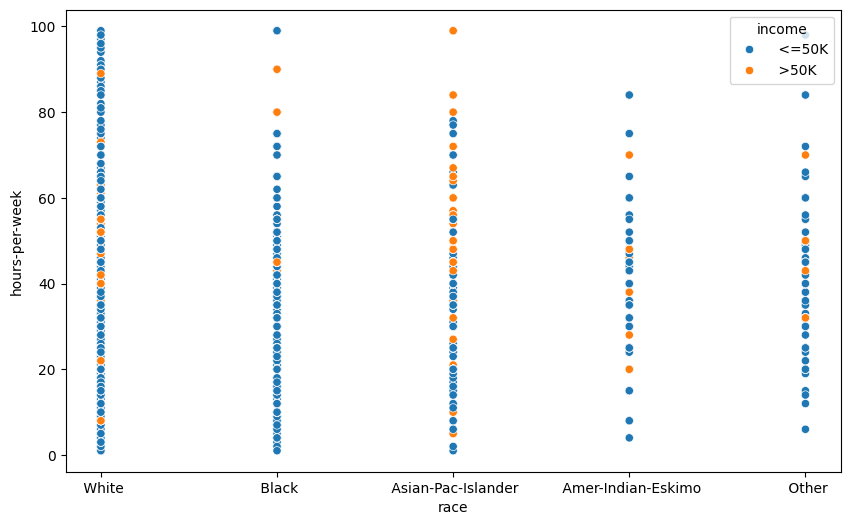

In [64]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='race', y='hours-per-week', data=adult_data, hue='income')


This plot shows that White people work far more hours than any other race while only a very few amount of those indivuduals who are white earn higher income, However majority of the Asian - Pacific - Islander race individuals earn higher income while working for  atlease 60 hours per week.

<AxesSubplot: xlabel='occupation'>

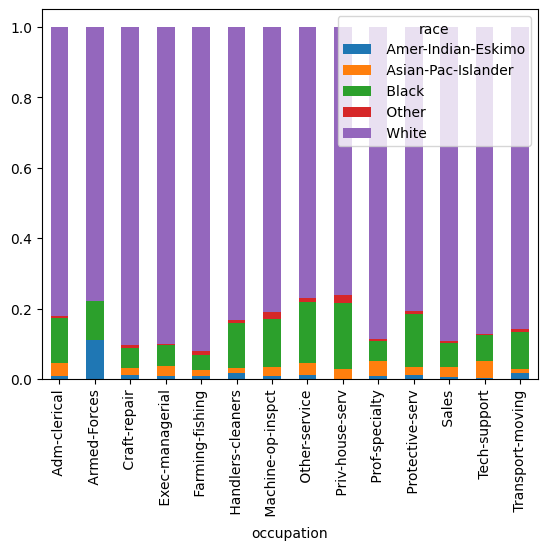

In [74]:
df = adult_data.groupby("occupation")["race"].value_counts(normalize=True).unstack()
df.plot(kind="bar", stacked="True")

This plot give a clear understanding about where each category of individuals work: 
<li> white people are often employed in fishing and farming thus involves lot of time this they work for more no of hours per week, thus revenus in these industries are lower compared to the rest
<br><br>
<li>Asian-pacific-Isnalnder groups of people are skilled this are employed higher in high skilled industries such as tech support, sales and adminstration roles, thes roles tend to have a fixed amount of hours per week as they are in the private sector, Revenues are much higher thus are passed on to these indicuduals in the form of higher income.
<br><br>
<li> majority of the black people are employed in protective services such as body guards, insspectors, armed forces, these jobs require a lot of labour. Due to lack of skill many immigrants end up in these services

<h2>Creating a Classification Algorithm</h2>

Preparing Dataset for Training

In [16]:
adult_data=pd.read_csv('Data/cleaned_adult_data.csv')
from sklearn.model_selection import train_test_split
X = adult_data.drop('income',axis=1)
y = adult_data['income']

Train test split parameter - for tuning

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

<h3>SVM Algorithm - check basic performance</h3>

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


categorical_columns = ['workclass','education','marital_status','occupation','relationship','sex','race','native-country']  
numerical_columns = ['age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week']  

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  
        ('cat', OneHotEncoder(), categorical_columns)  
    ])

svm_model = SVC()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', svm_model)])

pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9054    6]
 [2595  410]]
              precision    recall  f1-score   support

       <=50K       0.78      1.00      0.87      9060
        >50K       0.99      0.14      0.24      3005

    accuracy                           0.78     12065
   macro avg       0.88      0.57      0.56     12065
weighted avg       0.83      0.78      0.72     12065



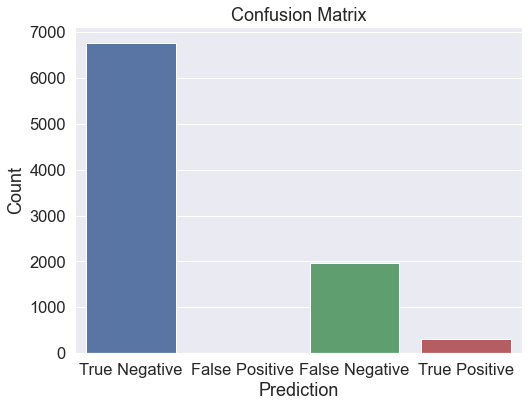

In [ ]:

cm = confusion_matrix(y_test, predictions)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

cm = cm.ravel()

sns.set(font_scale=1.5) 
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=cm)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

This shows that the model predicts incorrectyl where the negative class is predicted as the positve class, we shall need to add more features to reduce this imbalance

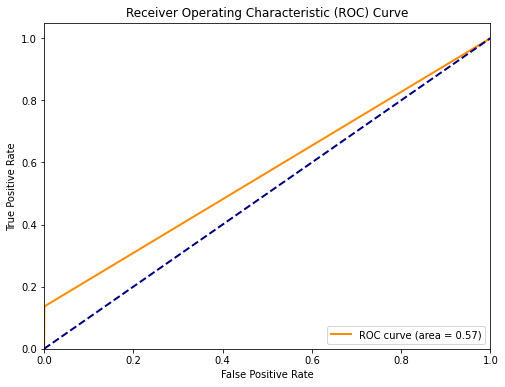

In [20]:
# Convert non-binary labels to binary labels
y_test_binary = np.where(y_test == ' >50K', 1, 0)
predictions_binary = np.where(predictions == ' >50K', 1, 0)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Need tp p

<h3>Naive Bayes Algorithm</h3>